---
# KARM

Un problème d' __optimisation__

Fabrice Mulotti<br>
Licence MIT<br>
Révision 4<br>

# Introduction

In [225]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from os import path
import sys


## Définissons les paramètres de notre environnement

In [226]:
K=5 # nombre de bras
recompense_centre=5 # récompense moyenne
dispersion_recompense=4 # écart par rapport à la moyenne
dispersion_resultat_par_bras=2.0 # facteur pour l`écart type appliqué à chaque bras lors des tirages


## Déterminer pour chaque bras sa récompense moyenne et l'écart type

In [227]:
np.random.seed(seed=42)
recompense_moyenne_bras = np.random.random(K)*dispersion_recompense+5
ecart_type_bras = (np.random.random(K)+0.5)*dispersion_resultat_par_bras

In [4]:
recompense_moyenne_bras

array([6.49816048, 8.80285723, 7.92797577, 7.39463394, 5.62407456])

In [7]:
reference = np.flip(np.argsort(recompense_moyenne_bras))
print(f"Ordre des bras décroissant {reference}")

Ordre des bras décroissant [1 2 3 0 4]


In [6]:
ecart_type_bras

array([1.31198904, 1.11616722, 2.73235229, 2.20223002, 2.41614516])

## Visualisons sur 10000 tirages à  quoi ressemble les résultats

In [70]:
np.random.seed(2023)
tirage=10000
sample = np.zeros((tirage,K))
for i in range(K):
    for j in range(tirage):
        sample[j,i]=np.random.normal(recompense_moyenne_bras[i],ecart_type_bras[i])

In [71]:
plt.figure()
sbn.boxplot(sample)
plt.xlabel("Bras")
plt.ylabel("Récompense")
plt.show()

![boxplots.jpg](static/boxplots.jpg)

***
## Functions et classes

### Pour être capable comparer nos résultats, nous allons utiliser un Dataframe pandas

In [187]:
def tirage(bras):
    # tirage pour un bras
    # entrée : numéro du bras
    # sortie : récompense pour un tirage
    return np.random.normal(recompense_moyenne_bras[bras],ecart_type_bras[bras])

# Fin introduction

---
## Round Robin

Dans une approche Round Robin, on tire un même nombre de fois chaque bras.
C'est donc une approche 'brute'.

In [107]:
# Ecrire une fonction qui renvoie les numéros de bras alternativement
# exemple 0 -> 1 -> 2 -> 3 -> 4 -> 0 ......
# c'est ici une politique, brute mais une politique néanmoins :)

def RoundRobinPolicy(action_passee,K):
    # Round robin policy : tire un bras l'un après l'autre
    # input : action= derniere action jouée, K nombre de bras
    # output : nouvelle action proposée

    # VOTRE CODE - 1 ligne
    
    return action_futur


In [ ]:
assert RoundRobinPolicy(1,2) == 0

# Vous allez compléter la boucle permettant de simuler l'entrainement.

In [228]:
np.random.seed(2023)
nombre_tirage=100

# Nous allons stocker les résultats pour chaque bras
Q = np.zeros((K)) # permet de stocket le cumul des récompenses
N = np.zeros((K)) # permet de stocker le nombre de fois qu'un bras est tiré

# conserver cet appel pour la suite pour comparer les résultats
# nombre de bras , valeur initial de la moyenne des récompenses, nom de la politique
result = []
action = K-1 # a changer en fonction de votre implémentation. Ma politique renvoie l'action suivante, donc RoundRobinPolicy(K-1,K) va renvoyer l'action 0

for i in range(nombre_tirage):
    action = # ?
    reward = # ? 
    result.append( ? )
    Q[ action ] += #? 
    N[ action ] += #? 

  File "/tmp/xpython_10008/177234395.py", line 14
    action = # ?
             ^
SyntaxError: invalid syntax



In [ ]:
result_round_robin =#? Cumul des récompenses 

In [ ]:
# calculer la récompense moyenne par bras et comparer avec les vrais valeurs paramétrées

In [ ]:
plt.figure()
plt.plot(result_round_robin)
plt.show()

---
# Greedy - valeur initiale élévée<br>
Avec une politique Greedy, notre algorithme choisi toujours le bras qui offre le meilleur rendement.

Donc si on a pas évalué au préalable les bras, et dans un environnement stable, il n'y a pas d'intérêt.


In [36]:
import numpy as np

In [229]:
def greedyPolicy(num_action, mean_reward_per_arm):
    # purpose : choisi le bras qui rapporte le plus
    # input : nombre de bras, moyenne de résultat connu par bras.
    # output : bras choisi

    ## votre code
    #action = mean_reward_per_arm.index(max(mean_reward_per_arm))
    action = np.argmax(mean_reward_per_arm)
    return action

In [13]:
greedyPolicy(5, np.array([0,1,1,0,2]))

4

In [230]:
np.random.seed(2023)
num_action = nombre_tirage
nombre_tirage=100

#Q=  [100] * num_action
#N= [0]* num_action

Q = np.full((K), 10)
N = np.zeros((K))

result = []
for i in range(nombre_tirage):
    action= greedyPolicy(K, Q/(N+1))
    reward= tirage(action)
    result.append(reward)
    Q[action] += reward
    N[action] +=1
    print(f"bras={action}, recompense(int{reward}), moyenne={np.round(Q/N+1)}")
   


/tmp/xpython_10008/3731277505.py:18: RuntimeWarning: divide by zero encountered in true_divide
  print(f"bras={action}, recompense(int{reward}), moyenne={np.round(Q/N+1)}")


bras=0, recompense(int7.431868347630945), moyenne=[18. inf inf inf inf]
bras=1, recompense(int8.440677752859905), moyenne=[18. 19. inf inf inf]
bras=2, recompense(int5.190512231866764), moyenne=[18. 19. 16. inf inf]
bras=3, recompense(int7.914912528474073), moyenne=[18. 19. 16. 18. inf]
bras=4, recompense(int5.377241556129524), moyenne=[18. 19. 16. 18. 16.]
bras=1, recompense(int7.528983803750662), moyenne=[18. 14. 16. 18. 16.]
bras=0, recompense(int9.980713711235706), moyenne=[14. 14. 16. 18. 16.]
bras=0, recompense(int8.388218701228725), moyenne=[12. 14. 16. 18. 16.]
bras=0, recompense(int6.6279191702170515), moyenne=[11. 14. 16. 18. 16.]
bras=3, recompense(int0.5203021099170826), moyenne=[11. 14. 16. 10. 16.]
bras=1, recompense(int7.601279048756534), moyenne=[11. 12. 16. 10. 16.]
bras=0, recompense(int6.070869316140063), moyenne=[10. 12. 16. 10. 16.]
bras=1, recompense(int7.647068436134308), moyenne=[10. 11. 16. 10. 16.]
bras=1, recompense(int8.327012391522507), moyenne=[10. 10. 16.

In [231]:
# stocker le résultat dans un tableau avec cumul
result_greedy_10 = np.cumsum(result)

In [232]:
# comparer les courbes round robin et greedy optimiste
plt.figure()
plt.plot(result_greedy_10, label='Greedy optimistic')
plt.legend()
plt.show()

***
## e-Greedy

e-Greedy (epsilon-glouton) choisit l'action réputée la plus payante selon une probabilité 1-epsilon ou aléatoire selon une probabilité epsilon.

Il serait intéressant de jouer avec les deux paramètres :<br>
__epsilon__<br>
__la valeur initiale__<br>

Pour la simulation considerez une valeur initiale à zero et ne testez que les variations d'epsilon

A noter que dès 1000 tirage, egreedy a trouver 100% des bras par ordre de rendement

In [150]:
def egreedyPolicy(num_action,epsilon,mean_reward_per_arm):

    # votre code
    # vous allez tirer un nombre aléatoire (uniforme)si celui est < epsilon, vous allez choisir une action au hasard, sinon 
    # vous choisissez la meilleur action connu.
    
    # Generate a random number to decide between exploration or exploitation
    if np.random.uniform(0, 1) < epsilon:
        # Exploration: choose a random action
        #print (' random < epsilon')
        action = np.random.choice(num_action)
    else:
        # Exploitation: choose the greedy action (the action with the highest mean reward)
        #print (' random >= epsilon')
        action = np.argmax(mean_reward_per_arm)
    
    #print(f"action {action}")
    return(action)

In [41]:
egreedyPolicy(3,0, [0,1,0])

 random >= epsilon
action 1


1

In [142]:
assert egreedyPolicy(3,0,[ 0,1,0]) == 1

 random >= epsilon
action 1


In [233]:
np.random.seed(2023)
nombre_tirage=100
epsilon=0.50

result=[]

for i in range(nombre_tirage):
    action= egreedyPolicy(K, epsilon, Q)
    reward =  tirage(action)
    result.append(reward)
    
    # Update N (number of pulls for this action)
    N[action] += 1
    
    # Update Q (mean reward estimate for the chosen action)
    Q[action] = Q[action] + (1 / N[action]) * (reward - Q[action])
    
    print(f"bras={action}, recompense(int{reward}), moyenne={np.round(Q/N+1)}")



bras=1, recompense(int8.47005719297293), moyenne=[10.  9. 16. 10. 16.]
bras=1, recompense(int8.928219921468434), moyenne=[10.  9. 16. 10. 16.]
bras=1, recompense(int9.013570129432644), moyenne=[10.  9. 16. 10. 16.]
bras=1, recompense(int10.766569143400197), moyenne=[10.  9. 16. 10. 16.]
bras=3, recompense(int9.058624913644646), moyenne=[10.  9. 16.  6. 16.]
bras=1, recompense(int8.649271529921942), moyenne=[10.  8. 16.  6. 16.]
bras=1, recompense(int10.344766235657334), moyenne=[10.  8. 16.  6. 16.]
bras=1, recompense(int8.945856381695513), moyenne=[10.  8. 16.  6. 16.]
bras=4, recompense(int8.895237717727776), moyenne=[10.  8. 16.  6.  6.]
bras=4, recompense(int3.8821851928425968), moyenne=[10.  8. 16.  6.  4.]
bras=4, recompense(int6.833050965344512), moyenne=[10.  8. 16.  6.  3.]
bras=1, recompense(int10.366675895032506), moyenne=[10.  8. 16.  6.  3.]
bras=1, recompense(int7.587054027669808), moyenne=[10.  8. 16.  6.  3.]
bras=4, recompense(int3.5011482820850737), moyenne=[10.  8. 1

In [234]:
# stocker le résultat dans un tableau avec cumul
result_epsilongreedy_ = np.cumsum(result)

In [235]:
# stocker le résultat dans un tableau avec cumul
# comparer les courbes round robin et greedy optimiste
plt.figure()
plt.plot(result_round_robin, label='Greedy optimistic')
plt.plot(result_greedy_10, label='Greedy optimistic')
plt.legend()
plt.show()

NameError: name 'result_round_robin' is not defined

In [ ]:
# comparer les courbes

---
# Espilon greedy decay¶

Nous avons 3 paramètres :
Nstep : vitesse de décroissance d'epsilon<br>
Epsilon max : début de la simulation : hasard fort<br>
Epsilon min : fin de simulation<br>

Excercice

Compléter le code.

Comparer l'efficacité notamment avec epsilon fixe

In [158]:
import numpy as np

np.random.seed(2023)
nombre_tirage = 100  # Total number of iterations
K = 10  # Number of arms
epsilonMax = 0.90  # Starting epsilon (high exploration)
epsilonMin = 0.05  # Minimum epsilon (low exploration)
NbPas = 80        # Number of steps for epsilon decay

result = []
eps = []  # To store epsilon values over time
Q = np.zeros(K)  # Mean reward estimates for each arm (initialize to 0)
N = np.zeros(K)  # Number of times each arm is selected (initialize to 0)

epsilon = epsilonMax  # Initialize epsilon to maximum value

for i in range(nombre_tirage):
    action= egreedyPolicy(K, epsilon, Q)
    
    # Simulate reward for the chosen action (you can modify this logic as needed)
    reward = np.random.randn() + (action + 1)  # Simulated reward
    
    # Update the total reward for the chosen action
    result.append(reward)
    
    # Update Q (mean reward estimate for the chosen action) using incremental formula
    N[action] += 1
    Q[action] = Q[action] + (1 / N[action]) * (reward - Q[action])
    
    # Adjust epsilon with linear decay
    epsilon = max(epsilonMin, epsilonMax - (i / NbPas) * (epsilonMax - epsilonMin))
    eps.append(epsilon)

# At the end of the loop:
# - 'result' contains the rewards collected over time
# - 'eps' contains the epsilon values over time (showing the decay)
# - 'Q' contains the final reward estimates for each arm


In [161]:
result_epsilongreedy_decay = np.cumsum(result)

In [ ]:
# stocker le résultat dans un tableau avec cumul

In [ ]:
# comparer les courbes

---
# LinUCB

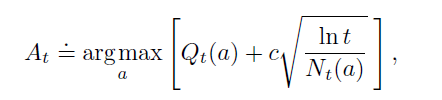

In [222]:
import numpy as np

def linUCBPolicy(mean_reward_arm, arm_usage, c, num_tirage):
    # Number of arms
    num_arms = len(mean_reward_arm)
    
    # Initialize an array to store UCB values for each arm
    ucb_values = np.zeros(num_arms)
    
    # Compute the UCB for each arm
    for a in range(num_arms):
        # mean_reward_arm[a] is the estimated mean reward for arm 'a'
        # arm_usage[a] is the number of times arm 'a' has been used
        if arm_usage[a] > 0:
            print (f'arm {a} has already been used')
            exploration_term = np.sqrt((np.log(num_tirage+1)) / (1 + arm_usage[a]))
        else:
            # If the arm hasn't been used, set a very high UCB to encourage exploration
            print(f'arm {a} has not yet been used')
            exploration_term = float('inf')
        
        # Calculate the UCB value
        ucb_values[a] = mean_reward_arm[a] + c * exploration_term        
    
    # Select the arm with the highest UCB value
    action = np.argmax(ucb_values)
    
    print(f'ucb_values: {ucb_values}')
    
    return action


In [223]:
import numpy as np

# Define the current state of the bandit problem
mean_reward_arm = np.array([1.0, 1.2, 0.8])  # Estimated mean rewards for 3 arms
arm_usage = np.array([5, 10, 2])  # Number of times each arm has been used
c = 1.0  # Exploration parameter
num_tirage = 20  # We are at the 20th pull (num_tirage)

# Call the linUCBPolicy function
chosen_arm = linUCBPolicy(mean_reward_arm, arm_usage, c, num_tirage)

# Output the selected arm
print("Chosen arm:", chosen_arm)


arm 0 has already been used
arm 1 has already been used
arm 2 has already been used
ucb_values: [1.71233448 1.72609388 1.80739308]
Chosen arm: 2


In [237]:
np.random.seed(2023)
nombre_tirage=10

Q = np.zeros((K))  # Estimated total rewards
N = np.zeros((K))  # Number of times each arm has been used

result=[]
c=0.5

# Initialize with small random values for better differentiation
mean_reward_arm = np.random.rand(K) * 0.1  

num_tirage = nombre_tirage
arm_usage = np.zeros(K)

for i in range(nombre_tirage):
    action=  chosen_arm = linUCBPolicy(mean_reward_arm, arm_usage, c, num_tirage)
    reward = tirage(action)
    print(f'i {i},  action: {action}, reward: {reward}')
    Q[action] += reward
    N[action] += 1
    
    arm_usage[action] += 1  # Update usage count for the chosen arm
    
    # Update the mean reward for the chosen arm
    if N[action] > 0:
        mean_reward_arm[action] = Q[action] / N[action]
        
    result.append(reward)   
    


arm 0 has not yet been used
arm 1 has not yet been used
arm 2 has not yet been used
arm 3 has not yet been used
arm 4 has not yet been used
ucb_values: [inf inf inf inf inf]
i 0,  action: 0, reward: 5.955683169554535
arm 0 has already been used
arm 1 has not yet been used
arm 2 has not yet been used
arm 3 has not yet been used
arm 4 has not yet been used
ucb_values: [6.50316551        inf        inf        inf        inf]
i 1,  action: 1, reward: 8.771854571919592
arm 0 has already been used
arm 1 has already been used
arm 2 has not yet been used
arm 3 has not yet been used
arm 4 has not yet been used
ucb_values: [6.50316551 9.31933691        inf        inf        inf]
i 2,  action: 2, reward: 8.443796222267645
arm 0 has already been used
arm 1 has already been used
arm 2 has already been used
arm 3 has not yet been used
arm 4 has not yet been used
ucb_values: [6.50316551 9.31933691 8.99127856        inf        inf]
i 3,  action: 3, reward: 11.269094007358156
arm 0 has already been use

In [83]:
Q

array([ 5.95568317, 33.66513977,  8.44379622, 25.12025099,  0.77249693])

In [240]:
# stocker le résultat dans un tableau avec cumul

result_linUCB = np.cumsum(result)    

In [ ]:
# comparer les courbes


---
# Méthode du gradient

![static/gradient.png](static/gradient.png)

Soit H notre tableau des préférences

In [ ]:
# Completer les fonctions suivantes.
def gradientPolicy(H,K):
    # retourne le bras avec la plus forte préférence
    # input : H préférence, K nombre de bras
    # Conseil : utiliser la fonction (méthode) choice de numpy
    action = #
    return action

def allProb(H):
    # calcul les probabilités pour tous les bras
    # renvoie un tableau numpy de dimension K contenant les probabilités pour chaque bras
    probs=# votre code
    return probs


def probArm(H,arm):
    # calcul la probabilité pour le bras arm passé en paramètre
    prob = # votre code
    return prob

def updatePreference(H,moyenneR,num_tirage,action,reward):
    # mise à jour de l'action qui a été jouée
    H_old = H

    # mise à jour de la préférence du bras choisi
    H[action] = H[action] + # ...  votre code 

    # mise à jour des préférences des autres bras
    for j in range(K):
        if j != action:
                # votre code
    moyenneR = (moyenneR * num_tirage + reward ) / (num_tirage + 1) 
    return H , moyenneR      

In [ ]:
np.random.seed(2024)

# préférence
H=np.zeros((K))
nombre_tirage=100

alpha=0.5

# hypothèse initiale de moyenne
moyenneR=5

for i in range(nombre_tirage):
    action= # votre code
    reward =# votre code
    
    # mise à jour des préférences
    H,moyenneR =  # votre code
    # print(action,allProb(H),H,moyenneR)


In [ ]:
# stocker le résultat dans un tableau avec cumul

In [ ]:
# comparer les courbes